# ***Simulasi***

13222018 Dennis Hubert

13222022 I Made Medika Surya

13223048 William Anthony

In [6]:
import os
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
from torchvision.utils import save_image
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pylab
import numpy as np

In [9]:
num_gpu = 1 if torch.cuda.is_available() else 0

# load the models
from dcgan import Discriminator, Generator

D = Discriminator(ngpu=1).eval()
G = Generator(ngpu=1).eval()

# load weights
D.load_state_dict(torch.load('weights/netD_epoch_99.pth', map_location=torch.device('cpu')))
G.load_state_dict(torch.load('weights/netG_epoch_99.pth', map_location=torch.device('cpu')))
if torch.cuda.is_available():
    D = D.cuda()
    G = G.cuda()

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# generate some images

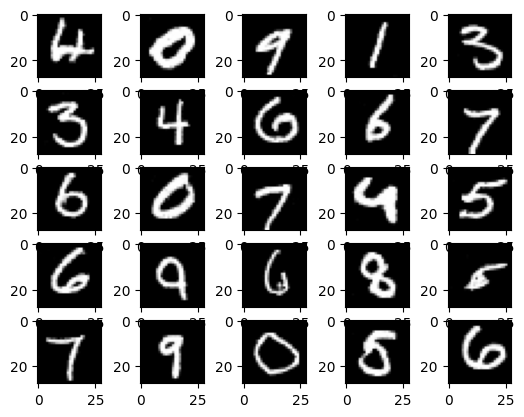

In [11]:
batch_size = 25
latent_size = 100

fixed_noise = torch.randn(batch_size, latent_size, 1, 1)
if torch.cuda.is_available():
    fixed_noise = fixed_noise.cuda()
fake_images = G(fixed_noise)


# z = torch.randn(batch_size, latent_size).cuda()
# z = Variable(z)
# fake_images = G(z)

fake_images_np = fake_images.cpu().detach().numpy()
fake_images_np = fake_images_np.reshape(fake_images_np.shape[0], 28, 28)
R, C = 5, 5
for i in range(batch_size):
    plt.subplot(R, C, i + 1)
    plt.imshow(fake_images_np[i], cmap='gray')
plt.show()

# run discriminator

In [12]:
outputs = D(fake_images)
print(outputs)

tensor([0.0185, 0.0052, 0.2587, 0.1370, 0.6360, 0.1683, 0.1446, 0.5673, 0.3012,
        0.1725, 0.2135, 0.4909, 0.3259, 0.4643, 0.0957, 0.1910, 0.1180, 0.0945,
        0.5510, 0.0408, 0.5673, 0.2813, 0.3692, 0.1402, 0.4214],
       grad_fn=<SqueezeBackward1>)


In [13]:
import torch
import scipy.io
import os
from dcgan import Generator, Discriminator  # Asumsi dari skrip Anda

# --- PARAMETER (Sesuaikan jika perlu) ---
# Parameter ini harus SAMA PERSIS dengan yang ada di dcgan.py
# Saya akan berasumsi berdasarkan arsitektur DCGAN standar
ngpu = 1
nz = 100  # Ukuran vektor noise
ngf = 64  # Ukuran fitur generator
ndf = 64  # Ukuran fitur diskriminator
nc = 1    # Jumlah channel (1 untuk MNIST/grayscale)

# --- Path File ---
path_g = 'weights/netG_epoch_99.pth'
path_d = 'weights/netD_epoch_99.pth'
output_g = 'netG_weights.mat'
output_d = 'netD_weights.mat'

# --- Fungsi untuk Konversi ---
def export_to_mat(model, weight_file, output_file):
    print(f"Memuat model dan bobot dari {weight_file}...")
    # Tentukan map_location
    if torch.cuda.is_available():
        map_location = lambda storage, loc: storage.cuda()
    else:
        map_location = 'cpu'

    model.load_state_dict(torch.load(weight_file, map_location=map_location))
    model.eval()

    # Buat dictionary baru untuk menyimpan bobot sebagai NumPy array
    py_weights = {}
    state_dict = model.state_dict()

    for key in state_dict:
        # Ganti '.' dengan '_' agar kompatibel dengan nama struct di MATLAB
        matlab_key = key.replace('.', '_')
        print(f"Memproses: {key} -> {matlab_key}")
        # Pindahkan tensor ke CPU, ubah jadi NumPy
        py_weights[matlab_key] = state_dict[key].detach().cpu().numpy()

    print(f"Menyimpan bobot ke {output_file}...")
    scipy.io.savemat(output_file, py_weights)
    print("Selesai.")

# --- Eksekusi ---
if __name__ == '__main__':
    # Inisialisasi model (arsitektur dari dcgan.py)
    # Pastikan parameter (nz, ngf, nc, dll.) SAMA PERSIS
    G = Generator(ngpu, nz=nz, ngf=ngf, nc=nc)
    D = Discriminator(ngpu, nc=nc, ndf=ndf) # nc dan ndf mungkin perlu disesuaikan

    # Ekspor Generator
    if os.path.exists(path_g):
        export_to_mat(G, path_g, output_g)
    else:
        print(f"File {path_g} tidak ditemukan.")

    # Ekspor Diskriminator
    if os.path.exists(path_d):
        export_to_mat(D, path_d, output_d)
    else:
        print(f"File {path_d} tidak ditemukan.")

Memuat model dan bobot dari weights/netG_epoch_99.pth...
Memproses: main.0.weight -> main_0_weight
Memproses: main.1.weight -> main_1_weight
Memproses: main.1.bias -> main_1_bias
Memproses: main.1.running_mean -> main_1_running_mean
Memproses: main.1.running_var -> main_1_running_var
Memproses: main.1.num_batches_tracked -> main_1_num_batches_tracked
Memproses: main.3.weight -> main_3_weight
Memproses: main.4.weight -> main_4_weight
Memproses: main.4.bias -> main_4_bias
Memproses: main.4.running_mean -> main_4_running_mean
Memproses: main.4.running_var -> main_4_running_var
Memproses: main.4.num_batches_tracked -> main_4_num_batches_tracked
Memproses: main.6.weight -> main_6_weight
Memproses: main.7.weight -> main_7_weight
Memproses: main.7.bias -> main_7_bias
Memproses: main.7.running_mean -> main_7_running_mean
Memproses: main.7.running_var -> main_7_running_var
Memproses: main.7.num_batches_tracked -> main_7_num_batches_tracked
Memproses: main.9.weight -> main_9_weight
Memproses: ma